# Distribution
* use describe()
* use correlation - corr()
* need to get numbers in right format


In [1]:
import numpy as np
import pandas as pd
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
combDF = pd.read_csv("../data/combDF.csv")
combDF.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count,meter,timestamp,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
0,0,0,Education,7432,2008.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
1,0,1,Education,2720,2004.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
2,0,2,Education,5376,1991.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
3,0,3,Education,23685,2002.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1
4,0,4,Education,116607,1975.0,NaN,0,2016-01-01 00:00:00,0.0,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,4,1


In [3]:
bMetaData = pd.read_csv("../kaggle-data/building_metadata.csv")
bMetaData.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


# Summary of Data
* square feet useful as it gives range of building size

In [4]:
x = combDF.drop(columns = ['site_id','building_id','primary_use','timestamp','meter']).describe()
x.astype(object)

,square_feet,year_built,floor_count,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
count,8.20011e+06,6.07672e+06,2.07789e+06,8.20011e+06,8.19819e+06,4.67534e+06,8.19748e+06,6.72735e+06,7.34229e+06,7.90931e+06,8.19717e+06,8.20011e+06,8.20011e+06,8.20011e+06
mean,85302,1970.71,4.63223,201.706,18.5256,2.50673,7.98468,0.564485,1015.53,175.128,3.59471,11.5019,3.00853,6.46859
std,100433,30.2317,2.91824,555.152,9.87709,2.41223,8.99092,6.57334,6.76651,110.086,2.26669,6.92075,1.99781,3.46738
min,283,1900,1,0,-13.3,0,-22.8,-1,973.3,0,0,0,0,1
25%,21903,1956,2,13.29,11.7,0,1.1,0,1010.9,80,2.1,6,1,3
50%,56467,1973,4,54.04,18,2,8.7,0,1015.5,180,3.1,12,3,6
75%,109071,1999,6,168.729,25.6,4,14.4,0,1019.9,270,4.6,18,5,9
max,850354,2017,16,172611,47.2,9,26.1,343,1045.5,360,18.5,23,6,12


# Distributions
* Bar graph of how many meter types - mostly electricity

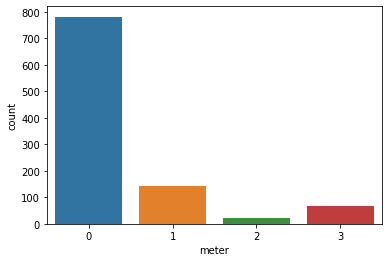

In [5]:
x = combDF[['building_id','meter']]
x = x.drop_duplicates()

sns.countplot(x='meter',data=x)

* how many meter points per building

[Text(0, 0, 'Education'),
 Text(0, 0, 'Lodging/residential'),
 Text(0, 0, 'Office'),
 Text(0, 0, 'Entertainment/public assembly'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Retail'),
 Text(0, 0, 'Parking'),
 Text(0, 0, 'Public services'),
 Text(0, 0, 'Warehouse/storage'),
 Text(0, 0, 'Food sales and service'),
 Text(0, 0, 'Religious worship'),
 Text(0, 0, 'Healthcare'),
 Text(0, 0, 'Utility'),
 Text(0, 0, 'Technology/science'),
 Text(0, 0, 'Manufacturing/industrial'),
 Text(0, 0, 'Services')]

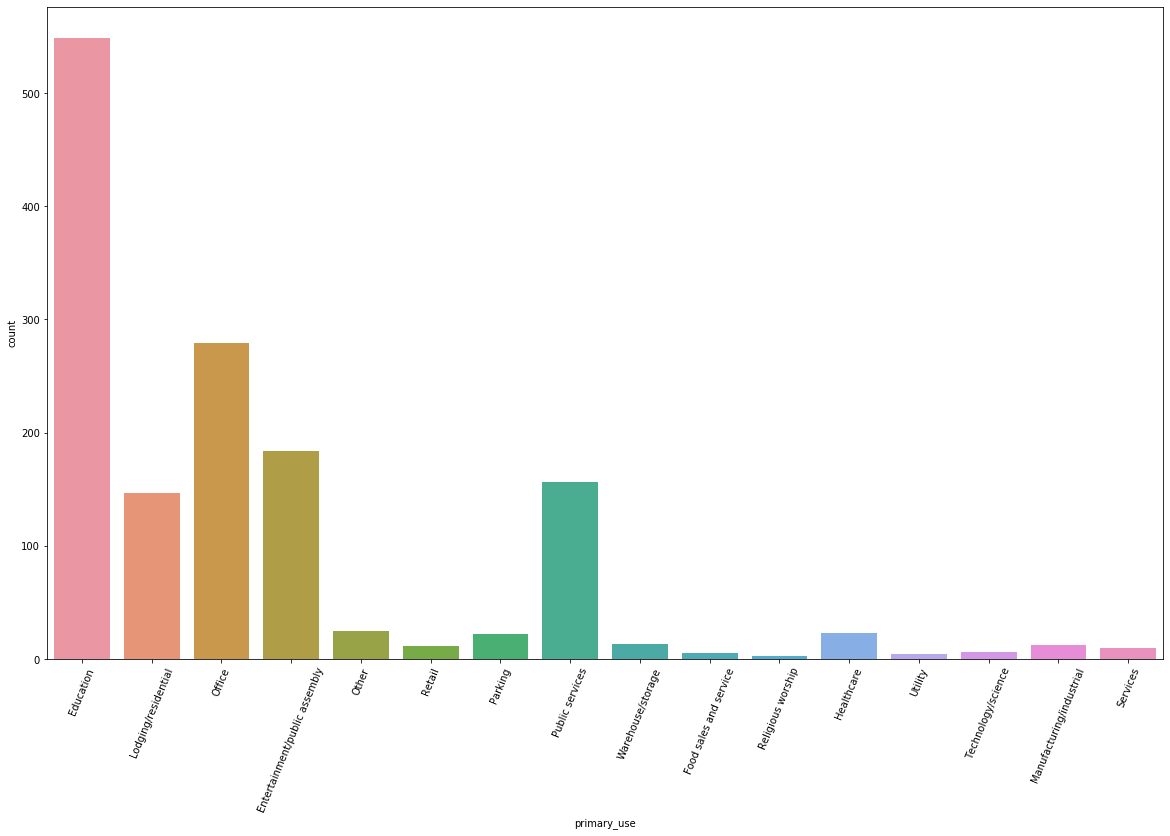

In [6]:
plt.figure(figsize=(20,12))
chart = sns.countplot(x='primary_use',data=bMetaData)
chart.set_xticklabels(chart.get_xticklabels(), rotation=67.5)

* Histogram of square feet to get building sizes

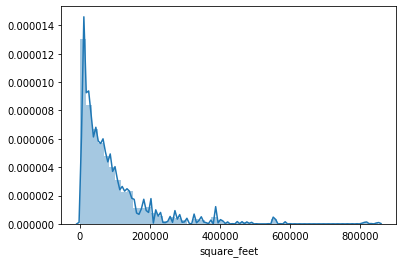

In [7]:
sns.distplot(combDF['square_feet'])

* Histogram of square feet according to use type

In [8]:
* Need meter reading max, min, etc per site
* Division between time stamp related and site related

SyntaxError: invalid syntax (<ipython-input-8-9e53a04ca3b1>, line 1)

# Building Attributes
* Square feet histogram
* Primary Use historgram
* Number of each metering point

# Energy Use per items
* Energy use based on Square feet histogram
* Energy use based on Primary use
* Histogram of average of all weather items and energy

# How do I want to present each variable?  What questions?  What are they proxies for?
* I am assuming 1 algorithm for all types of meters - but won't different variables impact them - algorithm will take that into account

# Correlation
* Meter_reading - most highly correlated with square feet, makes sense, others little correlation, surprised air temp has such low correlation with meter_reading (may because all three types)
* When group by meter relationships become strong between variables

In [9]:
#need to remove
combDF.drop(columns = ['site_id','building_id','timestamp','meter']).corr()

,square_feet,year_built,floor_count,meter_reading,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,weekday,month
square_feet,1.000000,0.154242,0.547185,0.278275,0.086348,-0.015631,-0.027077,-0.005577,-0.050301,-0.024129,-0.043585,0.000011,-0.000143,-0.002004
year_built,0.154242,1.000000,0.042698,0.194290,0.181308,0.038031,0.128597,0.021296,-0.000239,-0.071728,-0.062042,0.000147,-0.000443,0.009900
floor_count,0.547185,0.042698,1.000000,0.547288,0.107156,0.131384,0.008308,-0.001098,-0.015199,-0.001698,-0.103382,0.000024,-0.000151,-0.009363
meter_reading,0.278275,0.194290,0.547288,1.000000,0.112399,0.023723,0.136119,0.012927,0.006048,-0.043854,-0.040028,0.026314,-0.015306,0.043902
air_temperature,0.086348,0.181308,0.107156,0.112399,1.000000,0.077668,0.495983,-0.019043,-0.428272,-0.040275,-0.045634,0.099712,-0.004025,0.197123
cloud_coverage,-0.015631,0.038031,0.131384,0.023723,0.077668,1.000000,0.275091,0.140127,-0.009636,-0.005806,0.125591,0.040709,-0.009895,0.009842
dew_temperature,-0.027077,0.128597,0.008308,0.136119,0.495983,0.275091,1.000000,0.071661,-0.087649,-0.089953,-0.019942,-0.004921,-0.004057,0.300095
precip_depth_1_hr,-0.005577,0.021296,-0.001098,0.012927,-0.019043,0.140127,0.071661,1.000000,-0.032122,-0.007991,0.041610,0.009381,-0.004350,-0.007060
sea_level_pressure,-0.050301,-0.000239,-0.015199,0.006048,-0.428272,-0.009636,-0.087649,-0.032122,1.000000,-0.111314,-0.152152,0.024473,-0.022876,0.081199
wind_direction,-0.024129,-0.071728,-0.001698,-0.043854,-0.040275,-0.005806,-0.089953,-0.007991,-0.111314,1.000000,0.398450,-0.016889,0.002510,-0.033084


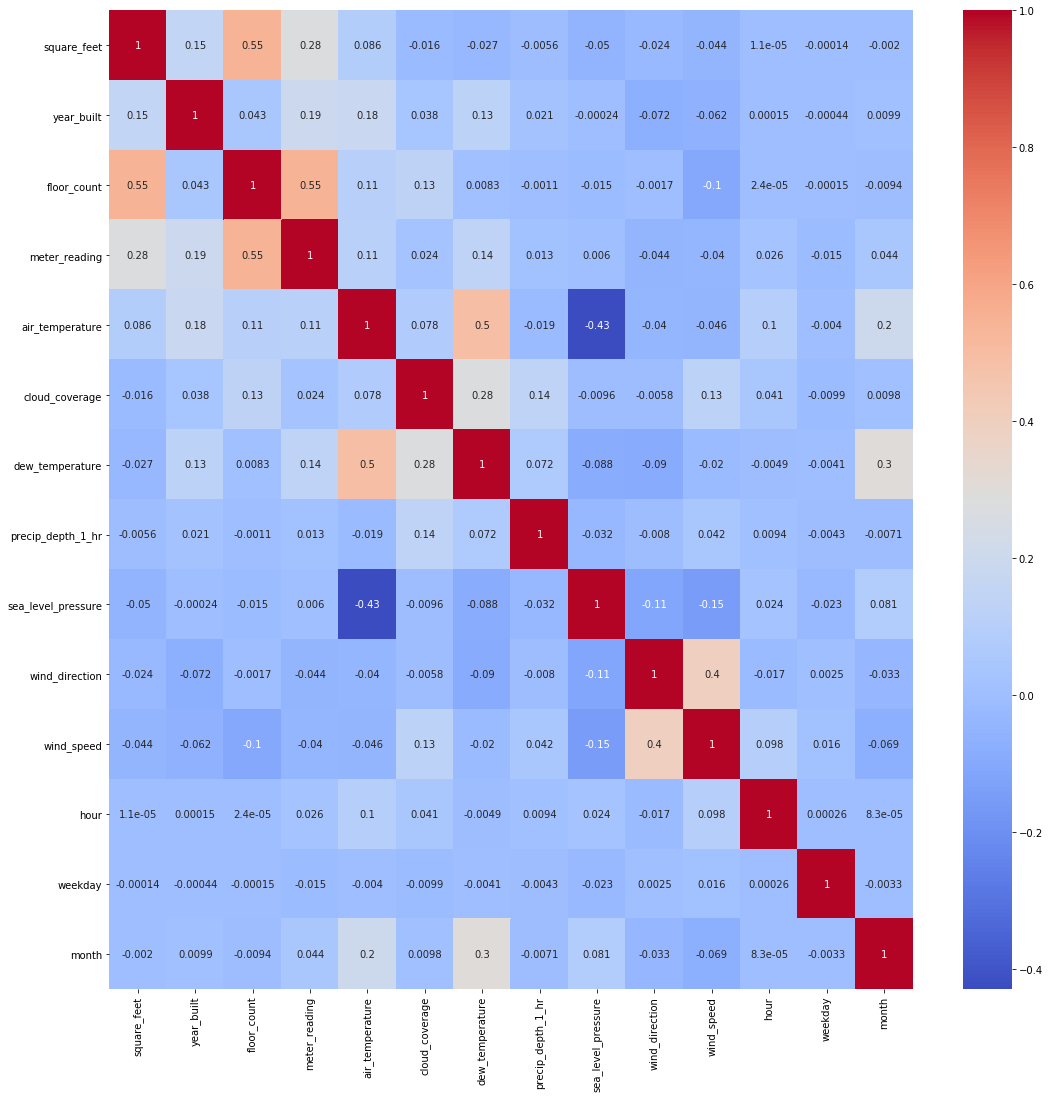

In [10]:
plt.figure(figsize=(18,18))
sns.heatmap(combDF.drop(columns = ['site_id','building_id','timestamp','meter']).corr(), annot=True,cmap='coolwarm')

C:\Users\dthoms\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


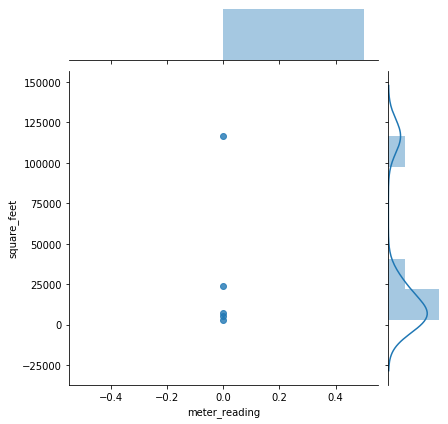

In [11]:
#need average meter_reading
sns.jointplot(x='meter_reading',y='square_feet',data = combDF.head(), kind = 'reg')

In [12]:
combDF.drop(columns = ['site_id','building_id','timestamp']).groupby('meter').corr()

square_feet  year_built  floor_count  meter_reading  \
meter                                                                           
0     square_feet            1.000000    0.113940     0.544822       0.545741   
      year_built             0.113940    1.000000     0.059066       0.165633   
      floor_count            0.544822    0.059066     1.000000       0.567136   
      meter_reading          0.545741    0.165633     0.567136       1.000000   
      air_temperature        0.062105    0.191992     0.121189       0.099597   
      cloud_coverage        -0.002847    0.038481     0.147935       0.017747   
      dew_temperature       -0.005219    0.137591     0.017140       0.092649   
      precip_depth_1_hr     -0.002813    0.021646    -0.001098       0.005302   
      sea_level_pressure    -0.025676   -0.002035    -0.015855      -0.003030   
      wind_direction        -0.015265   -0.073089     0.000374      -0.036044   
      wind_speed            -0.032464   -0.061311    -0.105113      -0.046417   
      hour                   0.000082    0.000033     0.000022       0.022053   
      weekday               -0.000319   -0.000147    -0.000163      -0.024374   
      month                 -0.003836    0.002738    -0.009444       0.069948   
1     square_feet            1.000000    0.350719          NaN       0.191039   
      year_built             0.350719    1.000000          NaN       0.394395   
      floor_count                 NaN         NaN          NaN            NaN   
      meter_reading          0.191039    0.394395          NaN       1.000000   
      air_temperature        0.005688   -0.013095          NaN       0.109220   
      cloud_coverage        -0.010896    0.085675          NaN       0.150125   
      dew_temperature       -0.042087    0.274300          NaN       0.434219   
      precip_depth_1_hr     -0.005687    0.033479          NaN       0.042958   
      sea_level_pressure    -0.031841    0.203072          NaN       0.168096   
      wind_direction         0.001864   -0.006920          NaN      -0.024900   
      wind_speed            -0.004174    0.029208          NaN       0.031874   
      hour                  -0.000660    0.000736          NaN       0.060497   
      weekday                0.001717   -0.002098          NaN      -0.018604   
      month                 -0.002966    0.053985          NaN       0.086915   
2     square_feet            1.000000         NaN          NaN       0.354488   
      year_built                  NaN         NaN          NaN            NaN   
      floor_count                 NaN         NaN          NaN            NaN   
      meter_reading          0.354488         NaN          NaN       1.000000   
      air_temperature        0.011202         NaN          NaN      -0.127251   
      cloud_coverage        -0.001468         NaN          NaN      -0.005481   
      dew_temperature        0.008848         NaN          NaN      -0.122195   
      precip_depth_1_hr     -0.000319         NaN          NaN      -0.014387   
      sea_level_pressure    -0.000731         NaN          NaN       0.066935   
      wind_direction        -0.000656         NaN          NaN       0.005401   
      wind_speed             0.002619         NaN          NaN      -0.024211   
      hour                  -0.003220         NaN          NaN      -0.004998   
      weekday                0.004593         NaN          NaN      -0.009332   
      month                  0.015410         NaN          NaN      -0.042987   
3     square_feet            1.000000    0.331707     0.832737       0.201381   
      year_built             0.331707    1.000000    -0.223518       0.052541   
      floor_count            0.832737   -0.223518     1.000000       0.328028   
      meter_reading          0.201381    0.052541     0.328028       1.000000   
      air_temperature        0.129664    0.110406    -0.000168      -0.249567   
      cloud_coverage         0.032706    0.028802     0.0

# Correlation Monthly, Weekday, Hourly